# Development Notebook for IFAT Simulator

In [1]:
from brian2 import *
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
MODE = 'adaptive'

In [3]:
# Define various equations

if MODE == 'adaptive':
    neuron_eq = '''
        dVm/dt = (glm / Cm) * (Vm_r - Vm) : volt
        dVt/dt = (glt / Ct) * (Vt_r - Vt) : volt

        glm = flm * Cl                    : siemens
        glt = flt * Cl                    : siemens
    '''
    reset_eq = '''
        Vm = Vm_r
        Vt = Vt * (Vt > Vm) + Vt_r * (Vt <= Vm)
    '''
    presyn_eq = '''
        Vm_old = Vm
        Vm = Vm_old + Vsyn
        Vt += (Cst/Ct) * (Vm_old - Vm_r)
    '''
else:
    neuron_eq = '''
        dVm/dt = (glm / Cm) * (Vm_r - Vm) : volt

        glm = flm * Cl                    : siemens
    '''
    reset_eq = '''
        Vm = Vm_r
    '''
    presyn_eq = '''
        Vm_old = Vm
        Vm = Vm_old + Vsyn
    '''

# Synapse equation is the same for both modes!
syn_eq = '''
    Vsyn = (W/Cm)*(Em - Vm) : volt
    Em                      : volt
    W                       : farad
'''

In [4]:
# IFAT specific definitions
Vdd = 5 * volt
Cm = Ct = 0.44 * pF
Cl = 0.02 * pF

W_vals  = np.array([5, 10, 20, 40, 80]) * 0.001 * pF
Em_vals = np.array([0, 1/3, 2/3, 1]) * Vdd


In [5]:
# Model parameters
Vm_r = 1 * volt
flm  = 10 * kHz
Csm  = W_vals[0]

Vt_r = 3 * volt
flt  = 0.2 * MHz
Cst  = 0 * pF

N = 4

In [6]:
start_scope()

In [8]:
# Start
test = NeuronGroup(N, neuron_eq, threshold='Vm >Vt', reset=reset_eq, method='exact')
test.Vm = Vm_r
test.Vt = Vt_r

In [ ]:
spgen = SpikeGeneratorGroup(1,[0],[100*ms])

In [16]:
# insyn = Synapses(spgen, test, syn_eq, on_pre=presyn_eq, multisynaptic_index='k')
# insyn.connect(i=0,j=0,n=100)
# insyn.delay='0.2*us+k*0.2*us'
# insyn.Em = Em_vals[1]
# insyn.W = Csm

In [9]:
# exc_syn = Synapses(test, test, syn_eq, on_pre=presyn_eq)
# exc_syn.connect('j==((i+1)%6)')
# exc_syn.Em = '4*volt'
# exc_syn.W = 30 * Csm

In [12]:
sp_mon = SpikeMonitor(test)
vm_mon = StateMonitor(test, 'Vmem', record=True)
vt_mon = StateMonitor(test,'theta',record=True)

In [13]:
run(1*second)

WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 4 lines of abstract code, first line is: "Vmem_old := Vmem (constant)"
 [brian2.codegen.generators.base]
WARNING    Came across an abstract code block that may not be well-defined: the outcome may depend on the order of execution. You can ignore this warning if you are sure that the order of operations does not matter. 4 lines of abstract code, first line is: "Vmem_old := Vmem (constant)"
 [brian2.codegen.generators.base]


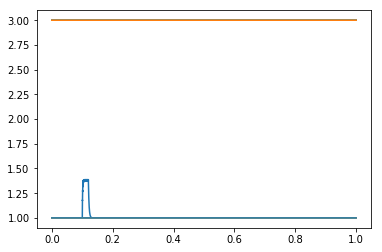

In [14]:
for i in range(6):
    plot(vmon.t, vmon.Vmem[i],tmon.t, tmon.theta[i])

(0.099, 0.11)

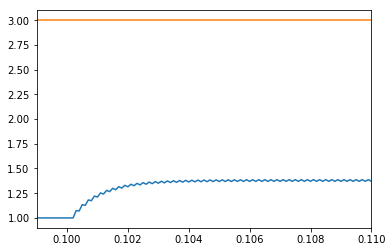

In [15]:
plot(vmon.t, vmon.Vmem[0],tmon.t, tmon.theta[0]);xlim([0.099,0.11])

(0.098, 0.102)

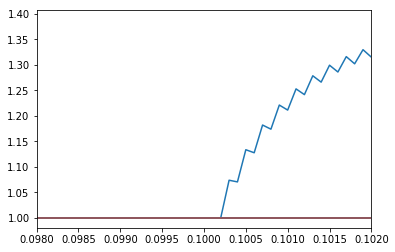

In [16]:
for i in range(6):
    plot(vmon.t, vmon.Vmem[i])
    
xlim([0.098,0.102])

(0.099, 0.11)

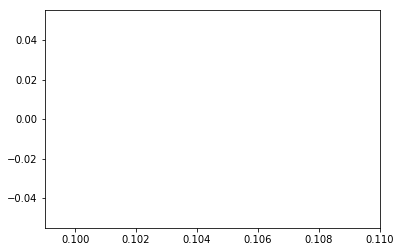

In [17]:
plot(mon.t, mon.i,'.'); xlim([0.099,0.11])

In [18]:
insyn

Synapses(clock=Clock(dt=100. * usecond, name='defaultclock'), when=start, order=0, name='synapses')

In [19]:
insyn.delay

<synapses_pre.delay: array([ 0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,
        2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,
        4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,
        6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,
        9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. ,
       11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2,
       13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4,
       15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6,
       17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8,
       20. ]) * msecond>